# Example 7: Logistic Regression

# Logistic Regression for Classification

Logistic Regression is a statistical method used for binary classification tasks, which can also be extended to multiclass classification via techniques like one-vs-rest (OvR). It predicts the probability that a given input belongs to a particular category.

## Key Points

- **Binary Classification**: Primarily used when there are two possible outcome classes. It models the probability that a given input point belongs to a particular class.
- **Sigmoid Function**: The core of logistic regression is the sigmoid function, which maps any real-valued number into the range (0, 1), making it useful for calculating probabilities.
- **Output Interpretation**: The output is a probability value between 0 and 1. A threshold (commonly 0.5) determines the class assignment (e.g., if the output is above 0.5, the input is classified into one class, otherwise the other).
- **Use Cases**: Commonly used in fields like medicine (disease diagnosis), finance (default prediction), marketing (customer churn prediction), etc.

Logistic regression is simple yet powerful, providing a probabilistic framework for classification tasks and a foundation for understanding more complex algorithms.


In [9]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

Here, we use the similar dataset to example 5A: 
1. Ranging $0 + \epsilon \leq x_1 \leq 5 + \epsilon$
2. Ranging $5 + \epsilon \leq x_1 \leq 10 + \epsilon$
3. Ranging $10 + \epsilon \leq x_1 \leq 15 + \epsilon$

The group classifications are 0, 1, 2, respectively. The goal is to construct a linear regression model that effectively finds these boundaries. 

Since there are no hyperparameters, we have no need for a validation set. Instead, we just use a testing set to provide metrics on the final model. We choose an 80%-20% split between training and testing. 

In [10]:
# Setting a random seed for reproducibility
np.random.seed(7)

# Generate synthetic data
size_per_class = 100
x1_0 = np.random.uniform(0, 5, size_per_class) + np.random.normal(0, 1, 100)
x2_0 = np.random.uniform(0, 10, size_per_class)

x1_1 = np.random.uniform(5, 10, size_per_class) + np.random.normal(0, 1, 100)
x2_1 = np.random.uniform(0, 10, size_per_class)

x1_2 = np.random.uniform(10, 15, size_per_class) + np.random.normal(0, 1, 100)
x2_2 = np.random.uniform(0, 10, size_per_class)

# Combine data
x1 = np.concatenate([x1_0, x1_1, x1_2])
x2 = np.concatenate([x2_0, x2_1, x2_2])
y = np.array([0]*size_per_class + [1]*size_per_class + [2]*size_per_class)

# Create DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data[['X1', 'X2']], data['Y'], test_size=0.3, random_state=7)

Let's plot this dataset to see the distribution of the categories. 

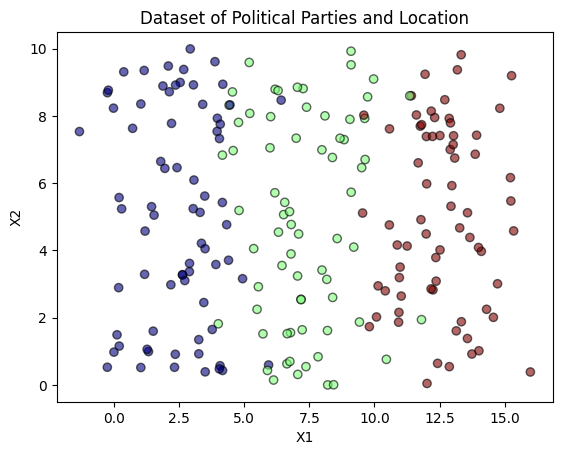

In [11]:
# Plot training set
plt.scatter(X_train['X1'], X_train['X2'], c=Y_train, edgecolors='k', cmap=plt.cm.jet, alpha=0.6)
plt.title("Dataset of Political Parties and Location")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Fitting a logistic regression is a straightforward process when we rely on scikit-learn for the computation. 

In [12]:
# Create and fit the linear regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = np.round(model.predict(X_test)) # rounded


We can evaluate how effective our model is at classifying the testing set using methods we have seen before. 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.83      0.77      0.80        31
           2       0.83      0.94      0.88        31

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



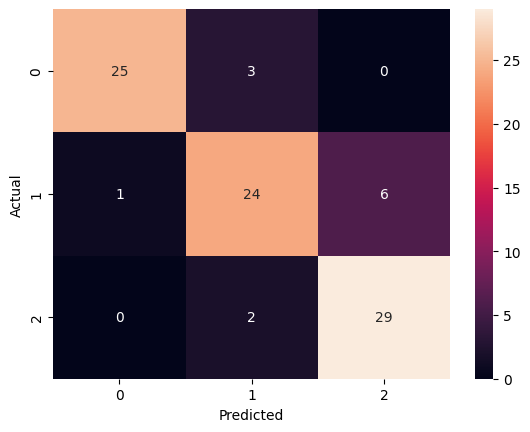

In [13]:
# Calculate Classification Report
acc = classification_report(Y_test, Y_pred)
print(acc)

# Display confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()


We can also plot our results to get a sense of our model (specifically, its decision boundaries) and its interaction with the testing set. In 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


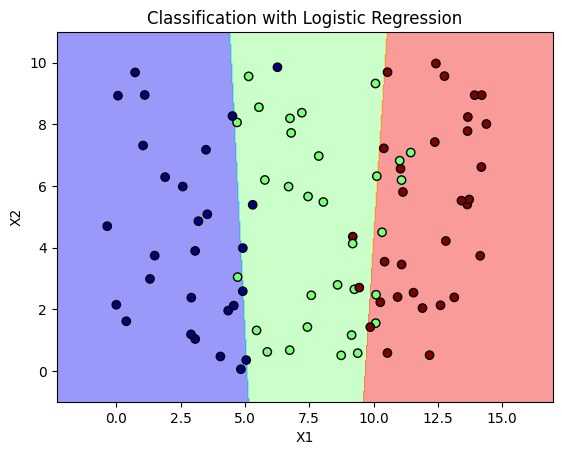

In [14]:
# Setting up the meshgrid for plotting decision boundaries
x1_min, x1_max = data['X1'].min() - 1, data['X1'].max() + 1
x2_min, x2_max = data['X2'].min() - 1, data['X2'].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict on meshgrid
Z = np.round(model.predict(np.c_[xx1.ravel(), xx2.ravel()])) # rounded
Z = Z.reshape(xx1.shape)

# Plot decision boundaries and data points
plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), cmap=plt.cm.jet)
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, edgecolors='k', cmap=plt.cm.jet)
plt.title("Classification with Logistic Regression")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()